In [1]:
%matplotlib inline
import pandas
import math
import matplotlib
from PIL import Image
from matplotlib.pyplot import imshow
import numpy as np

In [2]:
data = pandas.read_csv('../data/20151119---SAMPLE2-PHREE-100XMEOH-MOBILITY_dt_temp_Apex3DIons.csv')
m_z = data.m_z.tolist()
rt = data.rt.tolist()
inten = data.inten.tolist()

In [3]:
print('RT:','min:',min(rt),'max:',max(rt),'dynamic range:',max(rt)-min(rt))
print('m/z:','min:',min(m_z),'max:',max(m_z),'dynamic range:',max(m_z)-min(m_z))
print('intensity:','min:',min(inten),'max:',max(inten),'dynamic range:',max(inten)-min(inten))

RT: min: 1.5118 max: 197.4992 dynamic range: 195.9874
m/z: min: 50.0828 max: 999.9721 dynamic range: 949.8893
intensity: min: 10 max: 2048592 dynamic range: 2048582


In [4]:
RT_min=min(rt)
m_z_min=min(m_z)
data.inten=data.inten/min(inten)
inten = data.inten.tolist()

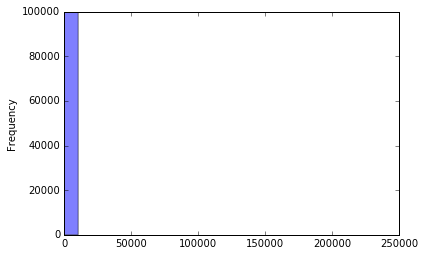

In [5]:
data.inten.plot(kind='hist', alpha=0.5,bins=20)

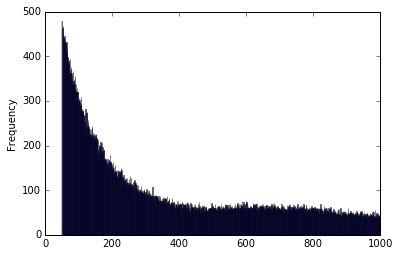

In [6]:
data.m_z.plot(kind='hist', alpha=0.5,bins=1000)

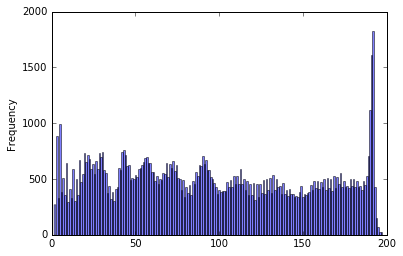

In [7]:
data.rt.plot(kind='hist', alpha=0.5,bins=200)

In [8]:
img=Image.new("F", (200,1000))

In [9]:
rt_step=(max(rt)-min(rt))/(200-1)
m_z_step=(max(m_z)-min(m_z))/(1000-1)

In [10]:
buffer = img.load()
for peak in zip(rt,m_z,inten):
    buffer[int((peak[0]-min(rt))/rt_step),int((peak[1]-min(m_z))/m_z_step)]+=peak[2]

In [12]:
img.show()